In [1]:
from google.colab import files
uploaded = files.upload()
import io
import zipfile
import pandas as pd

for fn in uploaded.keys():
  if fn.endswith('.zip'):
    with zipfile.ZipFile(io.BytesIO(uploaded[fn]), 'r') as zip_ref:
      zip_ref.extractall('/content')


Saving Copy of Copy of devnagari digit.zip to Copy of Copy of devnagari digit.zip


In [3]:
from google.colab import drive
drive.mount('/content/drive')
df1 = '/content/DevanagariHandwrittenDigitDataset/Test'
df2 = '/content/DevanagariHandwrittenDigitDataset/Train'

Mounted at /content/drive


In [7]:
!pip install tensorflow
import tensorflow as tf
tf.keras.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.6 MB/s eta 0:00:00


'3.8.0'

In [59]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


Training set: (3000, 28, 28, 1), Labels: (3000, 10)
Testing set: (17000, 28, 28, 1), Labels: (17000, 10)


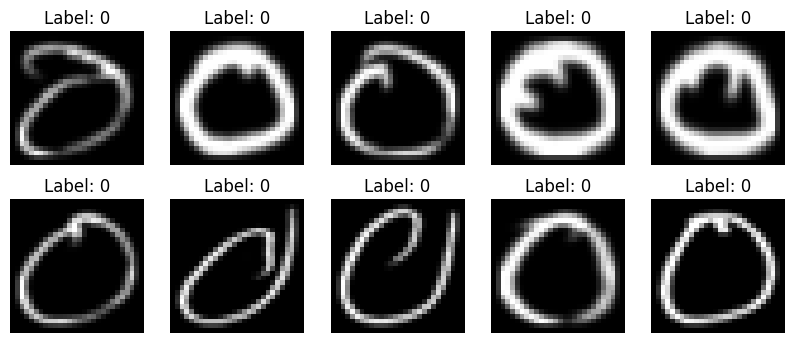

In [77]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow
# Define dataset paths
train_dir = "/content/DevanagariHandwrittenDigitDataset/Test"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
# Define image size
img_height, img_width = 28, 28
# Function to load images and labels using PIL
def load_images_from_folder(folder):
  images = []
  labels = []
  class_names = sorted(os.listdir(folder)) # Sorted class names (digit_0, digit_1, ...)
  class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)
      # Load image using PIL
      img = Image.open(img_path).convert("L") # Convert to grayscale
      img = img.resize((img_width, img_height)) # Resize to (28,28)
      img = np.array(img) / 255.0 # Normalize pixel values to [0,1]
      images.append(img)
      labels.append(label)
  return np.array(images), np.array(labels)
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

In [78]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
def build_functional_model():
    # Input layer
    inputs = keras.Input(shape=input_shape)
    # Flatten layer
    x = keras.layers.Flatten()(inputs)
    # Hidden layers
    x = keras.layers.Dense(64, activation="sigmoid")(x)
    x = keras.layers.Dense(128, activation="sigmoid")(x)
    x = keras.layers.Dense(256, activation="sigmoid")(x)
    # Output layer
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model
# Build the model
functional_model = build_functional_model()
functional_model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(
optimizer="sgd", # Stochastic Gradient Descent
loss="categorical_crossentropy", # Loss function for multi-class classification
metrics=["accuracy"] # Track accuracy during training
)

In [86]:
batch_size = 128
epochs = 10
# Callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/ai data/model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1235 - loss: 2.1904 - val_accuracy: 0.0000e+00 - val_loss: 4.2553
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1242 - loss: 2.1878 - val_accuracy: 0.0000e+00 - val_loss: 4.3235
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1112 - loss: 2.1887 - val_accuracy: 0.0000e+00 - val_loss: 4.3833
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1238 - loss: 2.1881 - val_accuracy: 0.0000e+00 - val_loss: 4.4490
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1221 - loss: 2.1838 - val_accuracy: 0.0000e+00 - val_loss: 4.4954


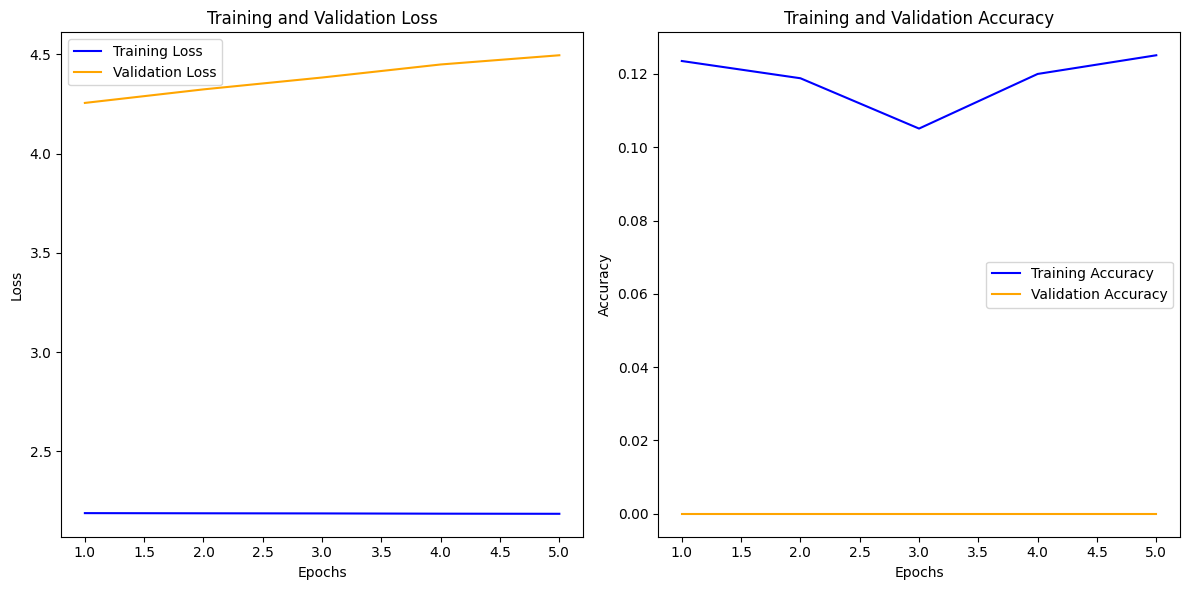

In [87]:
import matplotlib.pyplot as plt
# Assuming ’history’ is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [88]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

532/532 - 1s - 2ms/step - accuracy: 0.1001 - loss: 2.5309
Test accuracy: 0.1001


In [89]:
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted label for first image: 1
True label for first image: 0


In [103]:
model.save('/content/drive/MyDrive/AI(data)/my_model.keras.h5')

In [105]:

predictions = model.predict(x_test)

# Convert predictions from probabilities to digit labels using np.argmax()
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the one-hot encoded y_test
true_labels = np.argmax(y_test, axis=1)

# Calculate the accuracy of the predictions
accuracy = np.mean(predicted_labels == true_labels)
print(f"Test Accuracy: {accuracy:.4f}")



532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Accuracy: 0.1001


In [107]:
import numpy as np

# Make predictions on the test set
y_pred_probabilities = model.predict(x_test)  # Predictions are probability distributions

# Convert probabilities to class labels (digits 0-9)
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Convert one-hot encoded y_test back to class labels for comparison
y_true_labels = np.argmax(y_test, axis=1)

# Print first 10 predictions
print("Predicted Labels:", y_pred_labels[:10])
print("True Labels:", y_true_labels[:10])

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted Labels: [1 1 1 1 1 1 1 1 1 1]
True Labels: [0 0 0 0 0 0 0 0 0 0]
